In [45]:
import tensorflow as tf
from tensorflow.keras import models, layers
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
from IPython.display import HTML
import os
import numpy as np

In [46]:
BATCH_SIZE = 32
IMAGE_SIZE = 256
CHANNELS=3
EPOCHS=50

In [47]:
dataset = tf.keras.preprocessing.image_dataset_from_directory(
    'D:/Masrafe/Coding/Git_Hub_code/ml_project/road_damage/pothole_detection_CNN-main/pothole_detection_CNN-main/Dataset',
    shuffle = True,
    image_size = (IMAGE_SIZE, IMAGE_SIZE),
    batch_size = BATCH_SIZE
)

Found 1530 files belonging to 3 classes.


In [48]:
class_names = dataset.class_names
class_names

['Crack', 'Pothole', 'Surface Erosion']

In [49]:
for image_batch, labels_batch in dataset.take(1):
    print(image_batch.shape)
    print(labels_batch.numpy())

(32, 256, 256, 3)
[1 0 0 2 0 0 2 2 0 0 2 1 0 2 0 0 0 1 0 0 2 0 2 2 0 2 2 0 1 0 2 1]


In [50]:
len(dataset)

48

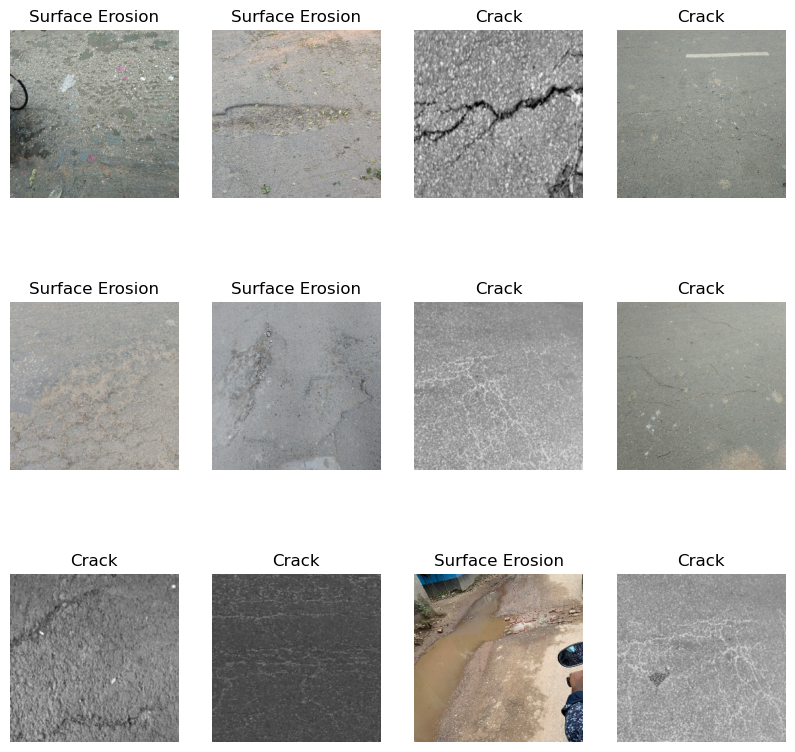

In [51]:
plt.figure(figsize=(10,10))
for image_batch, labels_batch in dataset.take(1):
    for i in range(12):
        ax = plt.subplot(3,4,i+1)  
        plt.imshow(image_batch[i].numpy().astype("uint8"))
        plt.title(class_names[labels_batch[i]])
        plt.axis("off")

In [52]:
train_size = 0.8
len(dataset)*train_size

38.400000000000006

In [53]:
train_ds = dataset.take(38)
len(train_ds)

38

In [54]:
test_ds = dataset.skip(38)
len(test_ds)

10

In [55]:
val_size=0.1
len(dataset)*val_size

4.800000000000001

In [56]:
val_ds = test_ds.take(4)
len(val_ds)

4

In [57]:
test_ds = test_ds.skip(4)
len(test_ds)

6

In [58]:
def get_dataset_partitions_tf(ds, train_split=0.8, val_split=0.1, test_split=0.1, shuffle=True, shuffle_size=10000):
    ds_size = len(ds)
    
    if shuffle:
        ds = ds.shuffle(shuffle_size, seed=12)
    
    train_size = int(train_split * ds_size)
    val_size = int(val_split * ds_size)
    
    train_ds = ds.take(train_size)    
    val_ds = ds.skip(train_size).take(val_size)
    test_ds = ds.skip(train_size).skip(val_size)
    
    return train_ds, val_ds, test_ds

In [59]:
train_ds, val_ds, test_ds = get_dataset_partitions_tf(dataset)

In [60]:
len(train_ds)

38

In [61]:
len(val_ds)

4

In [62]:
len(test_ds)

6

In [63]:
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
val_ds = val_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)
test_ds = test_ds.cache().shuffle(1000).prefetch(buffer_size=tf.data.AUTOTUNE)

In [64]:
resize_and_rescale = Sequential([
    layers.Resizing(IMAGE_SIZE, IMAGE_SIZE),
    layers.Rescaling(1./255)
])

In [65]:
data_augmentation = Sequential([
    layers.RandomFlip("horizontal_and_vertical"),
    layers.RandomRotation(0.2),
])

In [66]:
input_shape = (BATCH_SIZE, IMAGE_SIZE, IMAGE_SIZE, CHANNELS)
n_classes = 3

model = models.Sequential([
    resize_and_rescale,
    layers.Conv2D(32, kernel_size = (3,3), activation='relu', input_shape=input_shape),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64,  kernel_size = (3,3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(n_classes, activation='softmax'),
])

model.build(input_shape=input_shape)

d:\Masrafe\Coding\python\anaconda\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [67]:
model.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential_3 (Sequential)       │ (32, 256, 256, 3)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (32, 254, 254, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (32, 127, 127, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (32, 125, 125, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (32, 62, 62, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (32, 60, 60, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (32, 30, 30, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (32, 28, 28, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (32, 14, 14, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_10 (Conv2D)              │ (32, 12, 12, 64)       │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (32, 6, 6, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_11 (Conv2D)              │ (32, 4, 4, 64)         │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_11 (MaxPooling2D) │ (32, 2, 2, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (32, 256)              │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (32, 64)               │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (32, 3)                │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 183,747 (717.76 KB)

 Trainable params: 183,747 (717.76 KB)

 Non-trainable params: 0 (0.00 B)

In [68]:
model.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=False),
    metrics=['accuracy']
)

In [69]:
history = model.fit(
    train_ds,
    batch_size=BATCH_SIZE,
    validation_data=val_ds,
    verbose=1,
    epochs=50,
)

Epoch 1/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 47s 1s/step - accuracy: 0.3738 - loss: 1.0985 - val_accuracy: 0.4426 - val_loss: 1.0868
Epoch 2/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 877ms/step - accuracy: 0.4287 - loss: 1.0803 - val_accuracy: 0.4508 - val_loss: 1.0075
Epoch 3/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 34s 887ms/step - accuracy: 0.4318 - loss: 1.0412 - val_accuracy: 0.4426 - val_loss: 1.0910
Epoch 4/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 864ms/step - accuracy: 0.4138 - loss: 1.0854 - val_accuracy: 0.4426 - val_loss: 1.0755
Epoch 5/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 881ms/step - accuracy: 0.4499 - loss: 1.0675 - val_accuracy: 0.4426 - val_loss: 1.0833
Epoch 6/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 33s 878ms/step - accuracy: 0.3872 - loss: 1.0898 - val_accuracy: 0.4426 - val_loss: 1.0537
Epoch 7/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 35s 927ms/step - accuracy: 0.4208 - loss: 1.0536 - val_accuracy: 0.4426 - val_loss: 1.0151
Epoch 8/50
38/38 ━━━━━━━━━━━━━━━━━━━━ 43s 1s/step - accuracy: 0.5186 - loss: 1.0027 - val_accuracy: 

In [70]:
scores = model.evaluate(test_ds)
scores

6/6 ━━━━━━━━━━━━━━━━━━━━ 2s 181ms/step - accuracy: 0.9599 - loss: 0.2182


[0.2701578438282013, 0.9583333134651184]

In [71]:
history

In [72]:
history.params

{'verbose': 1, 'epochs': 50, 'steps': 38}

In [73]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

In [74]:
history.history['accuracy']

[0.39669421315193176,
 0.4033057987689972,
 0.4033057987689972,
 0.4082644581794739,
 0.4082644581794739,
 0.39256197214126587,
 0.4223140478134155,
 0.5462809801101685,
 0.5289255976676941,
 0.6041322350502014,
 0.6421487331390381,
 0.6834710836410522,
 0.7123966813087463,
 0.7305785417556763,
 0.7239669561386108,
 0.7743801474571228,
 0.7826446294784546,
 0.8066115975379944,
 0.7826446294784546,
 0.8148760199546814,
 0.8231405019760132,
 0.831404983997345,
 0.831404983997345,
 0.8264462947845459,
 0.8561983704566956,
 0.8603305816650391,
 0.8776859641075134,
 0.8776859641075134,
 0.886776864528656,
 0.8859503865242004,
 0.9033057689666748,
 0.9157024621963501,
 0.9041322469711304,
 0.8933884501457214,
 0.9173553586006165,
 0.9314049482345581,
 0.9396694302558899,
 0.944628119468689,
 0.952892541885376,
 0.9520661234855652,
 0.9504132270812988,
 0.9462810158729553,
 0.9561983346939087,
 0.9628099203109741,
 0.9586777091026306,
 0.960330605506897,
 0.9636363387107849,
 0.96033060550689

In [75]:
(history.history['loss'])

[1.089961290359497,
 1.0789177417755127,
 1.0710420608520508,
 1.0839613676071167,
 1.0826689004898071,
 1.0877964496612549,
 1.055761456489563,
 0.9942541122436523,
 0.9774885177612305,
 0.8980894684791565,
 0.8564342260360718,
 0.8006631731987,
 0.7411364912986755,
 0.6821334958076477,
 0.6473291516304016,
 0.6036110520362854,
 0.5590423941612244,
 0.526367723941803,
 0.5304197072982788,
 0.4663015902042389,
 0.4615616202354431,
 0.4436851739883423,
 0.4294668734073639,
 0.41337257623672485,
 0.37944769859313965,
 0.34717419743537903,
 0.2996561527252197,
 0.3133327066898346,
 0.28311359882354736,
 0.2724989950656891,
 0.2518393099308014,
 0.2189113199710846,
 0.23121756315231323,
 0.30052581429481506,
 0.21139657497406006,
 0.19148597121238708,
 0.159430593252182,
 0.16096243262290955,
 0.1335393637418747,
 0.14169283211231232,
 0.12213482707738876,
 0.15422070026397705,
 0.10804843157529831,
 0.11054664850234985,
 0.11356586962938309,
 0.10513561218976974,
 0.09234728664159775,
 0.

In [76]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

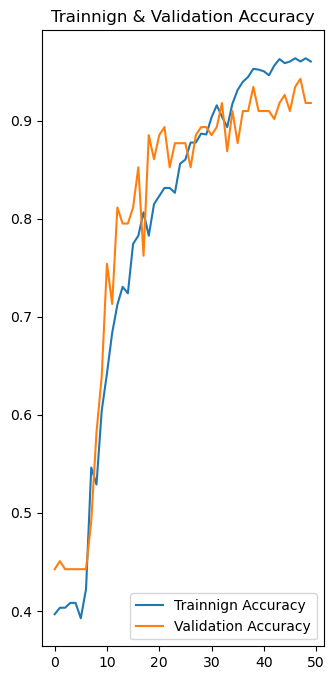

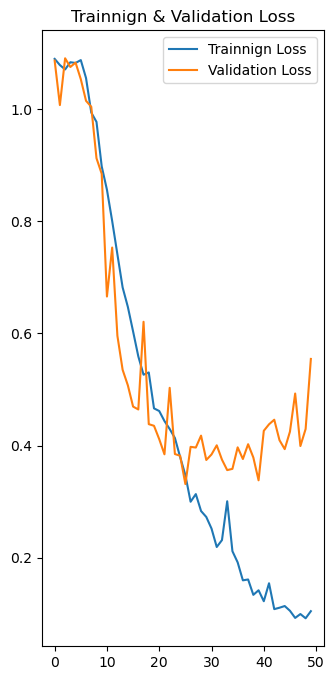

In [77]:
plt.figure(figsize = (8,8))
plt.subplot(1, 2, 1)
plt.plot(range(EPOCHS), accuracy, label = "Trainnign Accuracy")
plt.plot(range(EPOCHS), val_accuracy, label = "Validation Accuracy")
plt.legend(loc = 'lower right')
plt.title("Trainnign & Validation Accuracy")

plt.figure(figsize = (8,8))
plt.subplot(1, 2, 2)
plt.plot(range(EPOCHS), loss, label = "Trainnign Loss")
plt.plot(range(EPOCHS), val_loss, label = "Validation Loss")
plt.legend(loc = 'upper right')
plt.title("Trainnign & Validation Loss")
plt.show()

In [78]:
model.evaluate(train_ds)

38/38 ━━━━━━━━━━━━━━━━━━━━ 7s 194ms/step - accuracy: 0.9636 - loss: 0.0888


[0.08290337771177292, 0.9710744023323059]

First image to predict
First image actual label:  Surface Erosion
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 350ms/step
Predicted Label:  Surface Erosion


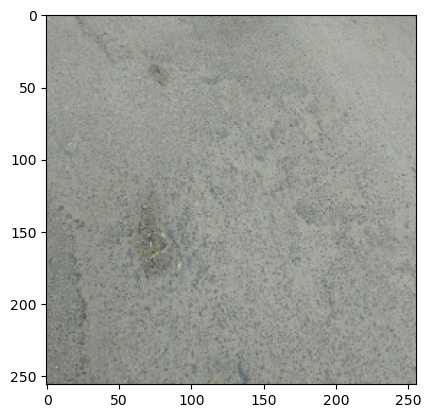

In [79]:
for image_batch, label_batch in test_ds.take(1):
    first_image = (image_batch[0].numpy().astype('uint8'))
    first_label = label_batch[0].numpy()
    
    print("First image to predict")
    plt.imshow(first_image)
    print("First image actual label: ", class_names[first_label])
    
    batch_prediction = model.predict(image_batch)
    print("Predicted Label: ",class_names[np.argmax(batch_prediction[0])])

In [80]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i].numpy())
    img_array = tf.expand_dims(img_array, 0)
    
    prediction = model.predict(img_array)
    
    predicted_calss = class_names[np.argmax(prediction[0])]
    confidence = round(100 * (np.max(prediction[0])), 2)
    
    return predicted_calss, confidence 

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 170ms/step
100.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
100.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
100.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
99.92
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
99.93
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
98.44
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
99.99
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
100.0
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step
99.39


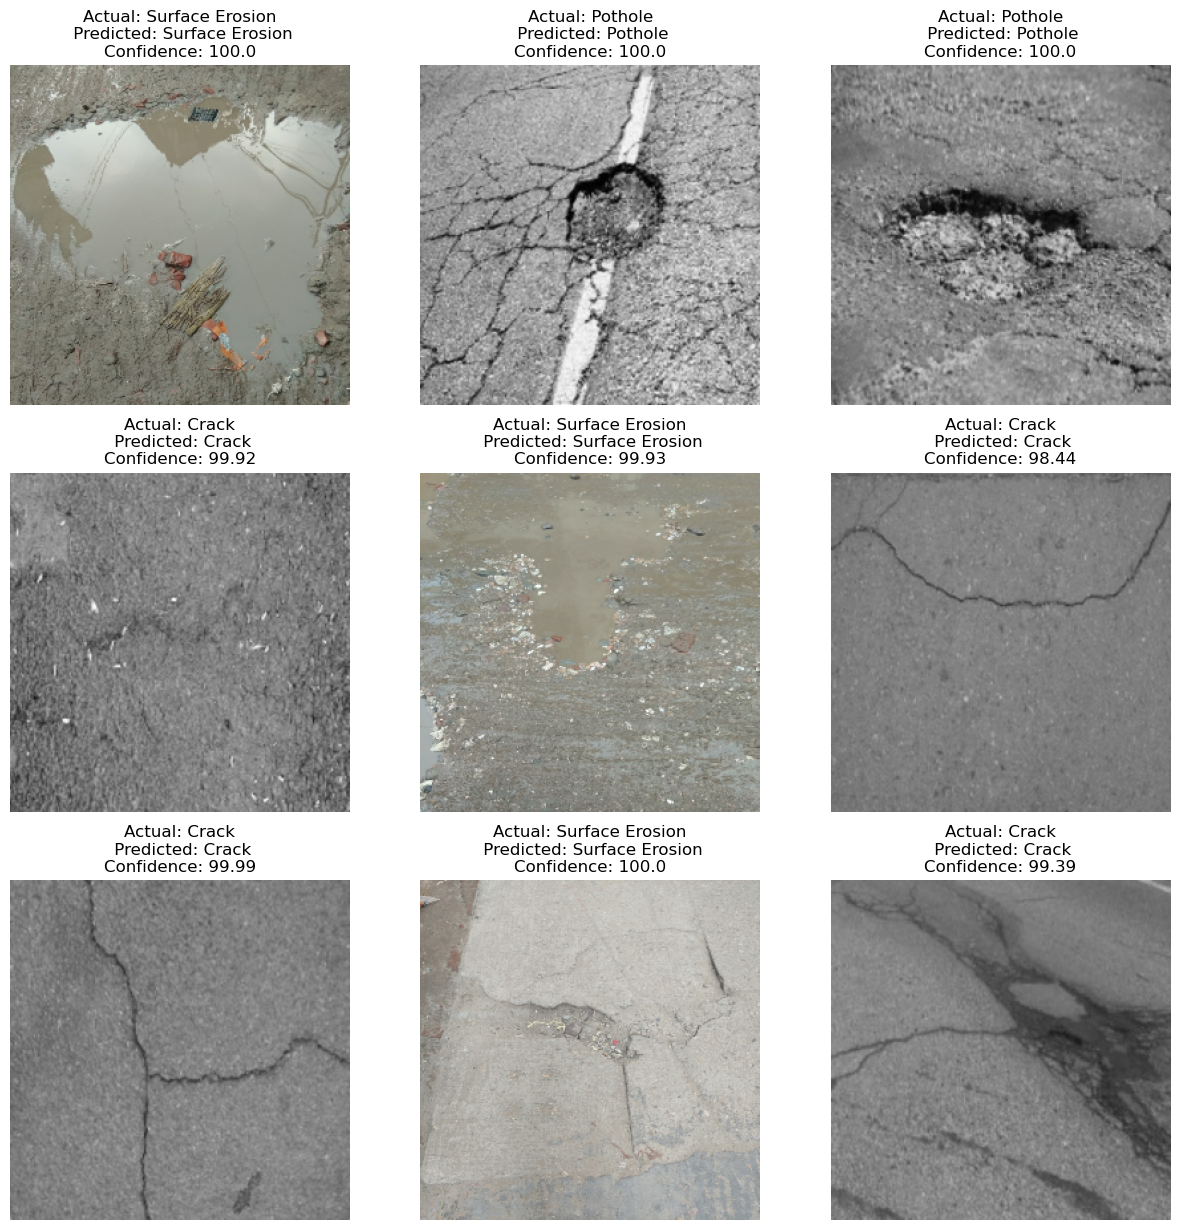

In [81]:
plt.figure(figsize=(15, 15))
for images, labels in test_ds.take(1):
    for i in range(9):
        ax = plt.subplot(3, 3, i+1)
        plt.imshow(images[i].numpy().astype("uint8"))
        
        predicted_class, connfidence = predict(model, images[i].numpy())
        actual_class = class_names[labels[i]]
        plt.title(f"Actual: {actual_class}\n Predicted: {predicted_class}\nConfidence: {connfidence}")
        print(connfidence)
        plt.axis("off")

In [82]:
confidence_threshold = 0.8
if connfidence >= confidence_threshold:
    print(f"Prediction: {predicted_class}, Confidence: {connfidence}")
else:
    print("Prediction confidence is too low.")


Prediction: Crack, Confidence: 99.39


In [83]:
from sklearn.metrics import classification_report, f1_score
#Collect true and predicted labels
y_true = []
y_pred = []

for images, labels in test_ds:
    preds = model.predict(images)
    y_true.extend(labels.numpy())
    y_pred.extend(np.argmax(preds, axis=1))

#Calculate F1 score (macro, weighted, etc.)
print("F1 Score (macro):", f1_score(y_true, y_pred, average='macro'))
print("F1 Score (weighted):", f1_score(y_true, y_pred, average='weighted'))

#Optional: Full classification report
print("\nClassification Report:\n")
print(classification_report(y_true, y_pred, target_names=class_names))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 223ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 217ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 222ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 216ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 210ms/step
F1 Score (macro): 0.9584505691476345
F1 Score (weighted): 0.9583277526440065

Classification Report:

                 precision    recall  f1-score   support

          Crack       0.97      0.97      0.97        60
        Pothole       0.96      0.94      0.95        54
Surface Erosion       0.95      0.96      0.96        78

       accuracy                           0.96       192
      macro avg       0.96      0.96      0.96       192
   weighted avg       0.96      0.96      0.96       192

